<a href="https://colab.research.google.com/github/brenoslivio/Statistics-Python/blob/main/1-DescriptiveAnalysis/1_DescriptiveAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Analysis

*There are many ways to analyse data, but one of the most known methods in Statistics is probably descriptive analysis,  which seeks to describe or summarize past and present data, helping to create accessible data insights. It's the field of Statistics that deals with the description and summarization of data. It will be given some pratical examples of these kind of analysis using a dataset. Recommended text for the subject are the Chapters 2 and 3 from **Introductory Statistics** by **Sheldon M. Ross**, which will be our main source of knowledge in this notebook.*



---



## Table of contents


1. [Data type](#type)

  1.1 [Qualitative variables](#qualita)

  * [Nominal](#nominal)

  * [Ordinal](#ordinal)

  1.2 [Quantitative variables](#quantita)

  * [Discrete](#discrete)

  * [Continuous](#cont)

2. [Measures of position](#mespos)

  2.1 [Quantiles](#quantiles)

  * [Percentiles](#percentiles)

  * [Deciles](#deciles)

  * [Quartiles](#quartiles)

  * [Median](#median)

  2.2 [Mean](#mean)

  2.3 [Mode](#mode)

3. [Measures of dispersion](#mesdis)

  3.1 [Variance](#variance)

  3.2 [Standard deviation](#sd)

  3.3 [Range](#range)

  3.4 [Interquantile range](#iqr)

4. [Table of frequencies](#table)

  4.1 [Absolute](#absolute)

  4.2 [Relative](#relative)

  4.3 [Simple](#simple)

  4.4 [Cumulative](#cumulative)

5. [Graphs](#graphs)

  5.1 [Pie chart](#pie)

  5.2 [Bar chart](#bar)

  5.3 [Boxplot](#boxplot)

  5.4 [Scatter plot](#dispersion)

  5.5 [Line](#line)

6. [Practicing with a dataset](#practice)





---



## Data type <a name="type"></a>

We can divide our data in some types which are definitely important to treat and understand the data to visualize and plot graphs.


### Qualitative variables <a name="qualita"></a>

Data like this don't have a proper mathematical meaning and they are usually used as labels for variables. They represent quality and the values can be associated with categories. Some can be sorted, but arithmetic operations are not aplicable.

#### Nominal <a name="nominal"></a>

We have examples as labeling data. They don't indicate a order relation.

$$\text{e.g.}~\text{Sex:}~\{Male, Female\}; \text{Bank Id:}~\{44641, 22442\}.$$ 

#### Ordinal <a name="ordinal"></a>

Like nominal data, they are labels but can indicate a kind of order.

$$\text{e.g.}~\text{Fever:}~\{High, Medium, Low\}; \text{Height:}~\{Tall, Short\}.$$

#### Scales

We have also nominal and ordinal scales.

**Nominal scales**: We can use operations such as $=$ and $\neq$.

**Ordinal scales**: We can use operations such as $=,\neq, \lt, \gt, \le, \ge $. 

### Quantitative variables <a name="quantita"></a>

This type of data have proper mathematical meaning and we can use for number operations. They are numeric and have some associated unit. They also can be sorted.

#### Discrete <a name="discrete"></a>

We have usually $\mathbb{Z}$ values, which are countable. Binary variables (boolean) are also discrete.

$$\text{e.g.}~\{5, 26, 51\}; \{0, 1\}$$

#### Continuous <a name="cont"></a>

In this case we have $\mathbb{R}$ values, which can be infinite. Continuous variables are usually defined as measurements.

$$\text{e.g.}~\text{Weight:}~\{2.57kg, 5.45kg, 3.89kg\}; \text{Distance:}~\{6.7km, 2.3km\}.$$

#### Scales

We have also interval and rational scales

**Interval scales**: We can use operations such as $=, \neq, \lt, \gt, \le, \ge, +, -$ e.g. ºC or ºF.

**Rational scales**: We can use operations such as $=, \neq, \lt, \gt, \le, \ge, +, -, *, /$ e.g. Kelvin temperature, money. This scale have an absolute zero.

## Measures of position <a name="mespos"></a>

### Quantiles <a name="quantiles"></a>

#### Percentiles <a name="percentiles"></a>

#### Deciles <a name="deciles"></a>

#### Quartiles <a name="quartiles"></a>

#### Median <a name="median"></a>

### Mean <a name="mean"></a>

### Mode <a name="mode"></a>

## Measures of dispersion <a name="mesdis"></a>

### Variance <a name="variance"></a>

### Standard deviation (population and sample) <a name="sd"></a>

### Range <a name="range"></a>

### Interquantile range <a name="iqr"></a>



## Table of frequencies <a name="table"></a>

Each variable can have different values. For example, we can have the variable `Fruit` with the situation that some values are 'Apple', 'Banana' and many others. We can analyse the frequency these values appear.

| Fruit | Simple absolute frequency $f_i$ | Simple relative frequency $n_i$ | Cumulative frequency $F_i$ | Relative cumulative frequency $N_i$ |
|-|-|-|-|-|
| Apple | 3 | $\frac{3}{15}$ | 3 | $\frac{3}{15}$ |
| Orange | 3 | $\frac{3}{15}$ | 3 + 3 = 6 | $\frac{6}{15}$ |
| Banana | 7 | $\frac{7}{15}$ | 3 + 3 + 7 = 13 | $\frac{13}{15}$ |
| Pear | 2 | $\frac{2}{15}$ | 3 + 3 + 7 + 2 = 15 | $\frac{15}{15}$ |
| $\sum$ | 15 | 1 |  |  |

### Absolute <a name="absolute"></a>

It's the number of times that a value appears. If we sum all the absolute frequencies we can find the total number of data $N$, so with $f_i$ being an absolute frequency for a value we have:

$$\displaystyle\sum_{i=1}^{n}f_i = N$$

### Relative <a name="relative"></a>

It's proportion of the frequency of a value $f_i$ compared to all data $N$. The sum of the relative frequencies must be 1:

$$n_i = \frac{f_i}{N}$$

### Simple <a name="simple"></a>

It works independently for each value. So we find a frequency based only on a value and the total of the data.

### Cumulative <a name="cumulative"></a>



Cumulative frequency depends on all values because we must sum them until we have the data $N$. It works for Absolute and Relative frequencies. So, in the first row we would have $f_1$ or $n_1$, second row $f_1 + f_2$ or $n_1 + n_2$ and so on.

## Graphs <a name="graphs"></a>

### Pie chart <a name="pie"></a>

### Bar chart <a name="bar"></a>

### Boxplot <a name="boxplot"></a>

### Scatter plot <a name="dispersion"></a>

### Line <a name="line"></a>



## Practicing with a dataset <a name="practice"></a>

Now we will practice with we saw in the notebook using a dataset in Brazilian Portuguese.

### Loading the dataset

In [70]:
import pandas as pd
import numpy as np

dfPoll = pd.read_csv("https://raw.githubusercontent.com/brenoslivio/Statistics-Python/main/1-DescriptiveAnalysis/dataset.csv",
    dtype={
        "Qual sua idade?": np.int32,
        "Qual sua altura em metros?": np.float64,
        "Seu peso em kg.": np.int32,
        "Sexo?": str,
        "Grau de escolaridade?": str,
        "Em qual estado você nasceu?": str,
        "Em quantos irmãos vocês são (contando contigo)?": np.int32,
        "Quantos membros tem sua família? (Quantos moram contigo, ou 1 caso more sozinho)": np.int32,
        "Você trabalha/estuda atualmente?": str,
        "Qual atividade realiza com mais frequência?": str,
    },
    na_values="",
)

dfPoll.columns =['age', 'height_m', 'weight_kg', 'sex', 'schooling', 'state', 'brothersplus_you', 'family_members', 'work_study', 'freq_activity'] 

dfPoll

,age,height_m,weight_kg,sex,schooling,state,brothersplus_you,family_members,work_study,freq_activity
0,20,1.82,85,M,Ensino superior (completo ou incompleto),SP,3,5,trabalho e estudo,Cozinhar
1,25,1.72,64,M,Pós-graduação (completo ou incompleto),MS,5,1,estudo,Rede social
2,29,1.82,65,M,Pós-graduação (completo ou incompleto),SP,1,2,estudo,Ler livro
3,27,1.63,60,F,Pós-graduação (completo ou incompleto),MS,2,4,trabalho,Assistir TV
4,28,1.57,63,F,Ensino superior (completo ou incompleto),MS,2,3,estudo,Rede social
...,...,...,...,...,...,...,...,...,...,...
63,22,1.81,92,M,Ensino superior (completo ou incompleto),SP,3,4,estudo,Ler livro
64,25,1.55,56,F,Ensino superior (completo ou incompleto),SP,3,5,estudo,Rede social
65,21,1.71,65,F,Ensino superior (completo ou incompleto),MG,2,2,trabalho e estudo,Rede social
66,18,1.67,75,F,Ensino superior (completo ou incompleto),SP,4,4,estudo,Ler livro


### Measures of position

In [71]:
dfPoll.quantile(0.25) # 25th percentile and 1st quartile

age                 20.00
height_m             1.60
weight_kg           62.75
brothersplus_you     2.00
family_members       2.00
Name: 0.25, dtype: float64

In [72]:
dfPoll.median()

age                 25.000
height_m             1.705
weight_kg           69.500
brothersplus_you     2.500
family_members       3.500
dtype: float64

In [73]:
dfPoll.mode().head(1)

,age,height_m,weight_kg,sex,schooling,state,brothersplus_you,family_members,work_study,freq_activity
0,20.0,1.67,65,M,Ensino superior (completo ou incompleto),SP,2.0,4.0,trabalho e estudo,Rede social


In [74]:
dfPoll['schooling'].mode()

0    Ensino superior (completo ou incompleto)
dtype: object

### Measures of dispersion

In [75]:
dfPoll.var()

age                  58.174495
height_m              0.012515
weight_kg           415.921861
brothersplus_you      1.559921
family_members        1.847893
dtype: float64

In [76]:
dfPoll.std()

age                  7.627221
height_m             0.111869
weight_kg           20.394162
brothersplus_you     1.248968
family_members       1.359372
dtype: float64

In [77]:
dfPoll['height_m'].max() - dfPoll['height_m'].min()

0.5999999999999999

In [78]:
# primeiro quartil e segundo quartil
Q1, Q3 = dfPoll.loc[:, 'age'].quantile([0.25, 0.75])
# distância interquartil
IQR = Q3 - Q1

IQR

10.0

In [79]:
dfPoll.describe()

,age,height_m,weight_kg,brothersplus_you,family_members
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,26.220588,1.695441,74.441176,2.691176,3.132353
std,7.627221,0.111869,20.394162,1.248968,1.359372
min,13.000000,1.300000,43.000000,0.000000,1.000000
25%,20.000000,1.600000,62.750000,2.000000,2.000000
50%,25.000000,1.705000,69.500000,2.500000,3.500000
75%,30.000000,1.772500,85.000000,3.000000,4.000000
max,51.000000,1.900000,140.000000,7.000000,6.000000


### Table of frequencies

In [80]:
dfPoll['freq_activity'].value_counts()

Rede social         20
Ler livro           15
Assistir TV         12
Jogar videogame     12
Cozinhar             6
Praticar esporte     3
Name: freq_activity, dtype: int64

In [81]:
dfPoll['freq_activity'].value_counts().cumsum()

Rede social         20
Ler livro           35
Assistir TV         47
Jogar videogame     59
Cozinhar            65
Praticar esporte    68
Name: freq_activity, dtype: int64

In [82]:
df = dfPoll['brothersplus_you'].value_counts()       
df / len(dfPoll['brothersplus_you'])

2    0.397059
3    0.323529
4    0.102941
1    0.088235
5    0.044118
7    0.029412
0    0.014706
Name: brothersplus_you, dtype: float64

### Graphs

#### Pie chart

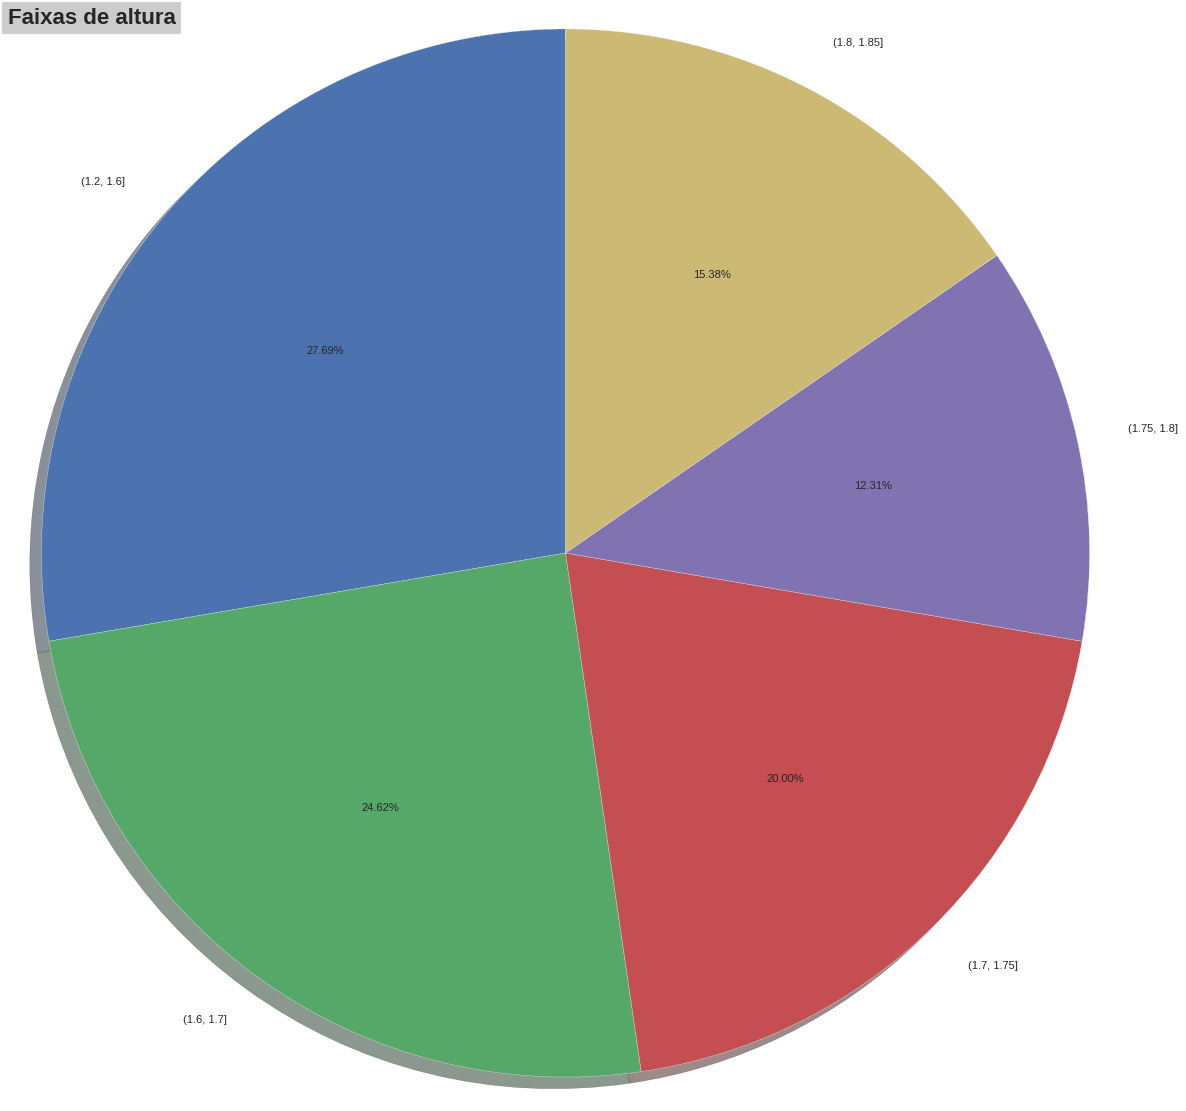

In [83]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('seaborn-dark')

ranges = [1.2, 1.6, 1.7, 1.75, 1.8, 1.85]
height = dfPoll['height_m'].groupby(pd.cut(dfPoll['height_m'], ranges)).count()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(height, labels = height.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Faixas de altura", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

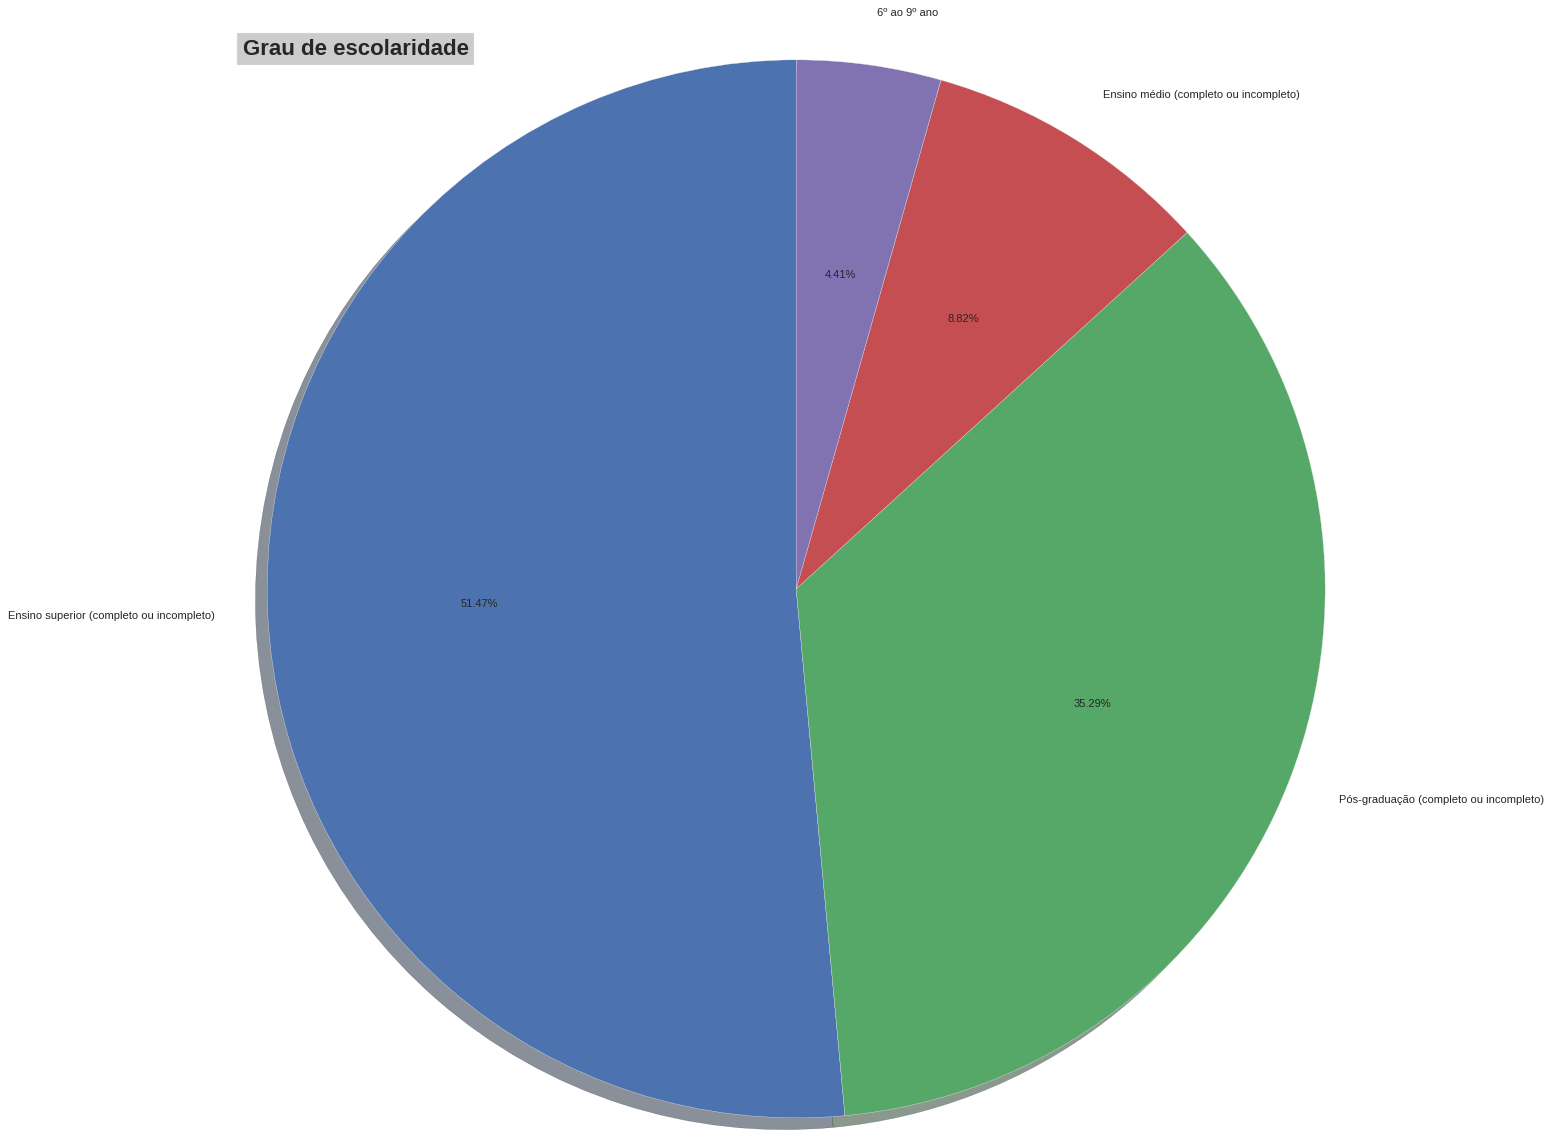

In [84]:
schooling = dfPoll['schooling'].value_counts()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(schooling, labels = schooling.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Grau de escolaridade", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

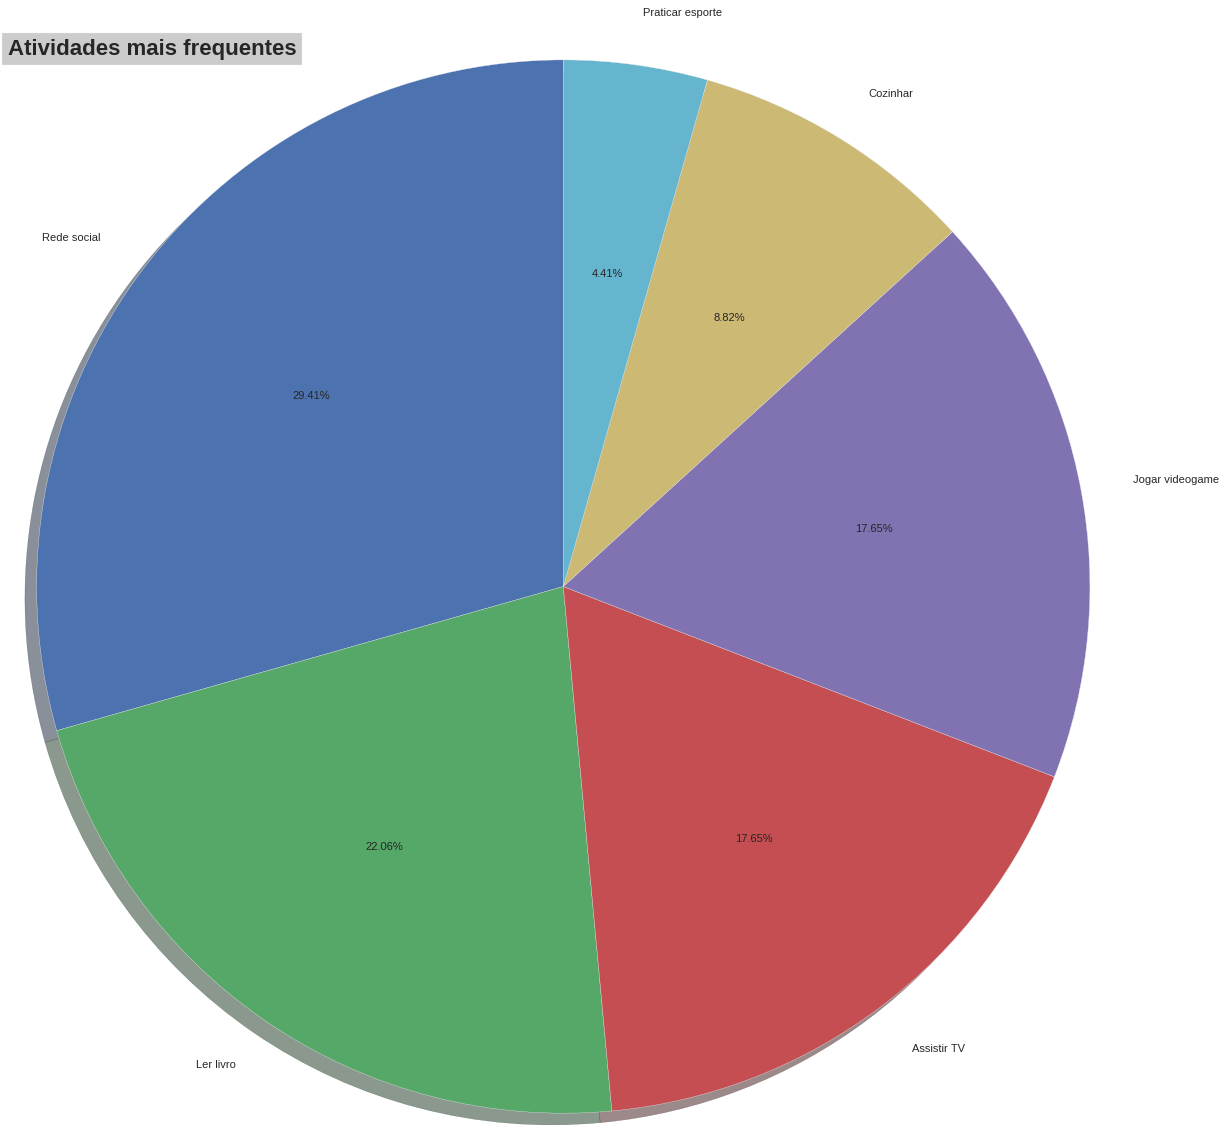

In [85]:
freq = dfPoll['freq_activity'].value_counts()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(freq, labels = freq.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Atividades mais frequentes", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

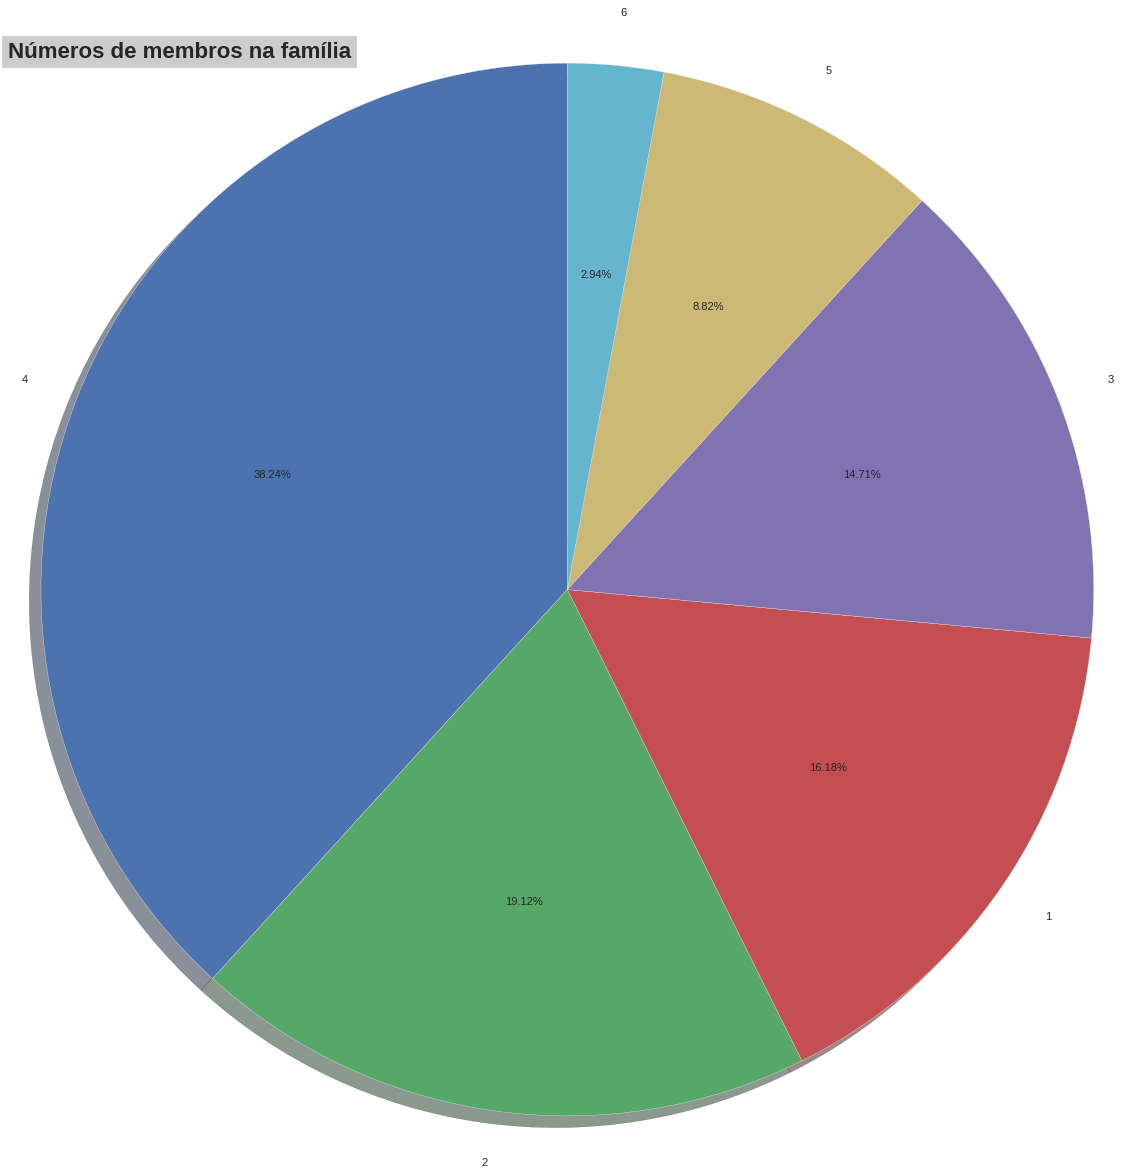

In [86]:
family = dfPoll['family_members'].value_counts()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(family, labels = family.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Números de membros na família", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

#### Bar chart

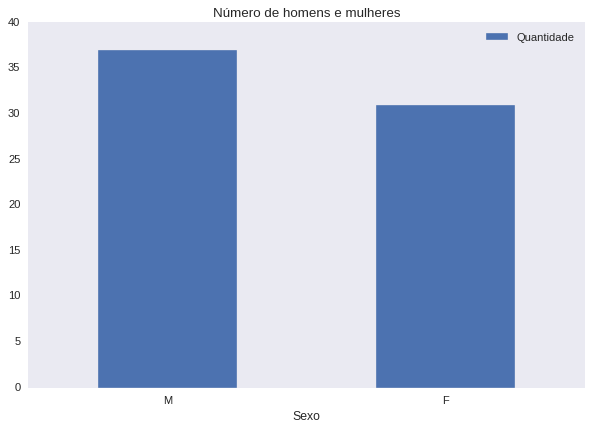

In [87]:
sex = dfPoll['sex'].value_counts().to_frame()

sex.reset_index(level=0, inplace=True) 
sex.columns = ['Sexo', 'Quantidade']

sex.plot.bar(x = 'Sexo', y = 'Quantidade', rot = 0, title = "Número de homens e mulheres");

plt.show(block=True);

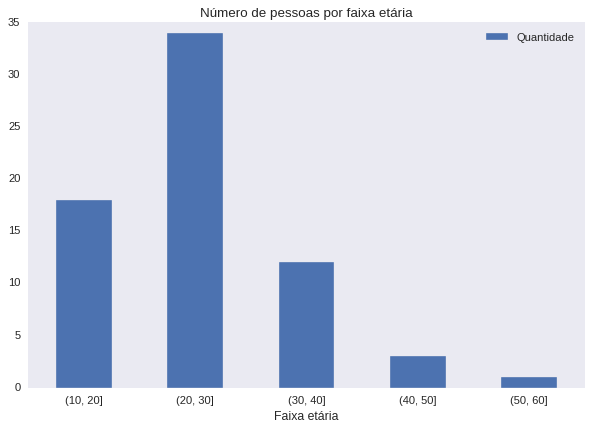

In [88]:
ranges = [10, 20, 30, 40, 50, 60]
age = dfPoll['age'].groupby(pd.cut(dfPoll['age'], ranges)).count().to_frame()
age.columns = ['Quantidade']
age.reset_index(level=0, inplace=True) 
age.columns = ['Faixa etária', 'Quantidade']

age.plot.bar(x = 'Faixa etária', y = 'Quantidade', rot = 0, title = "Número de pessoas por faixa etária");

plt.show(block=True);

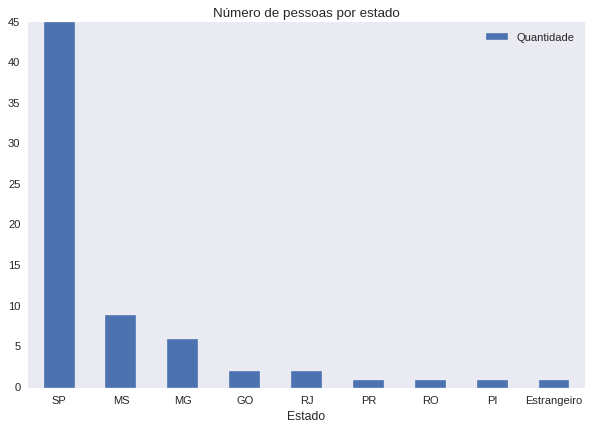

In [89]:
state = dfPoll['state'].value_counts().to_frame()

state.reset_index(level=0, inplace=True) 
state.columns = ['Estado', 'Quantidade']

state.plot.bar(x = 'Estado', y = 'Quantidade', rot = 0, title = "Número de pessoas por estado");

plt.show(block=True);

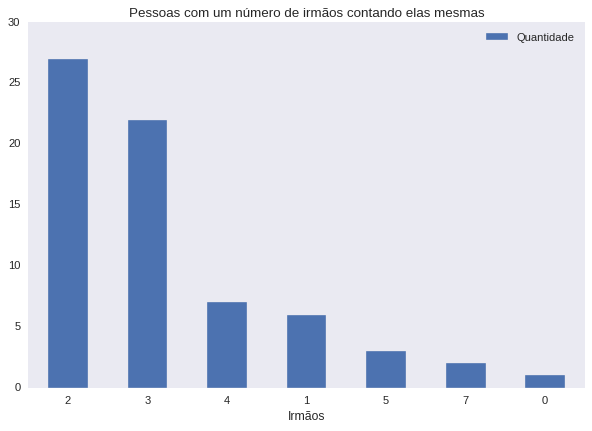

In [97]:
brothers = dfPoll['brothersplus_you'].value_counts().to_frame()

brothers.reset_index(level=0, inplace=True) 
brothers.columns = ['Irmãos', 'Quantidade']

brothers.plot.bar(x = 'Irmãos', y = 'Quantidade', rot = 0, title = "Pessoas com um número de irmãos contando elas mesmas");

plt.show(block=True);

#### Boxplot

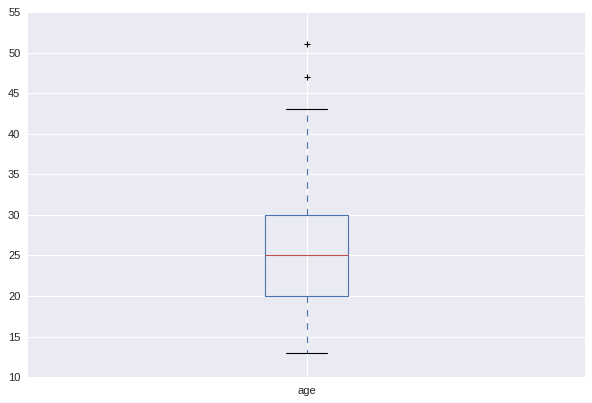

In [91]:
dfPoll.boxplot(column=['age'])

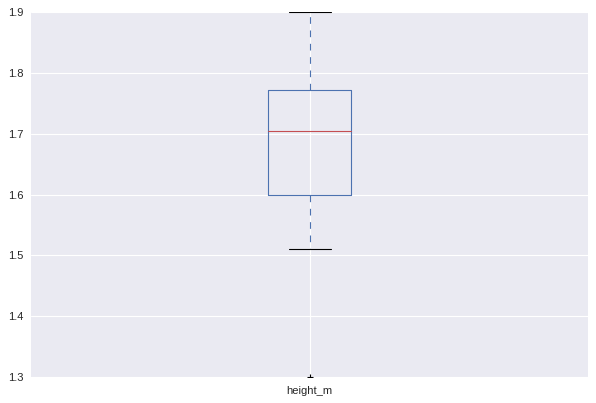

In [92]:
dfPoll.boxplot(column=['height_m'])

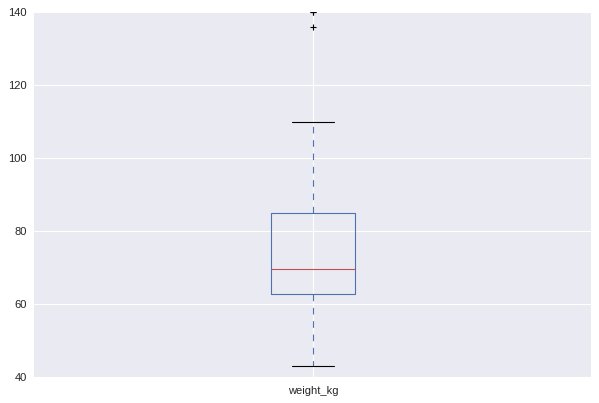

In [93]:
dfPoll.boxplot(column=['weight_kg'])

#### Scatter plot

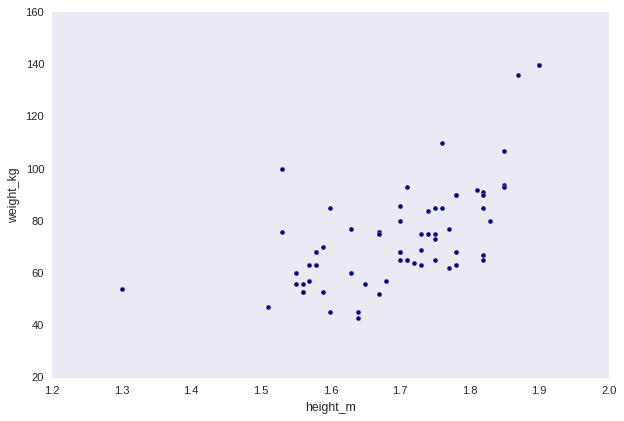

In [94]:
dfPoll.plot.scatter(x = 'height_m',
                      y = 'weight_kg',
                      c = 'DarkBlue')

#### Line

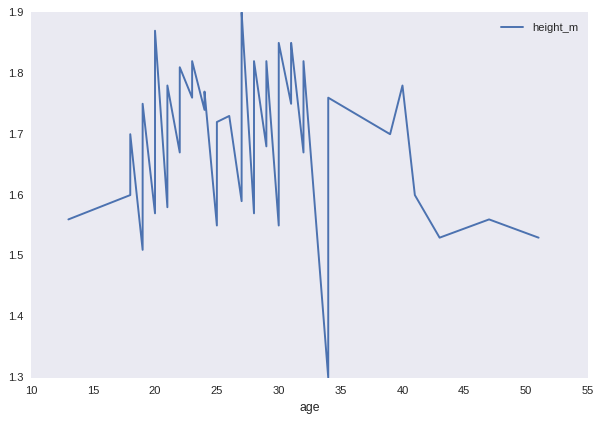

In [95]:
df = dfPoll

df = df.sort_values(by=['age', 'height_m'])

df.plot(x = 'age', y = 'height_m', kind = 'line')
plt.show()